In [125]:
%load_ext autoreload
%aimport data_creater
%aimport model
%autoreload 1

from model import forcast_ploting
from model import Predictor
from data_creater import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [89]:
tickers = ['FB','GOOG','AAPL','IBM','MMM','AXP']

In [133]:
start_date = '20190101' 
end_date = '20191110'
#download quotes from yahoo and save to directory
for ticker in tickers:
    Predictor.download_prep(ticker,start_date,end_date)

In [158]:
stock_1 = tickers[2]
print("***  Closing price prediction for {} *** ".format(stock_1))
pred = Predictor(stock_1,target_length=1)
pred.select_model(verbose=1)
# pred.graph()
pred.db_return(index = 1)

***  Closing price prediction for AAPL *** 


KeyError: 'close_delta_1'

                    y2       close
2019-09-12  213.088308  222.422226
2019-09-13  212.216118  218.095215
2019-09-16  214.138541  219.241776
2019-09-17  214.174670  220.039383
2019-09-18  215.325413  222.103195
2019-09-19  214.588453  220.298615
2019-09-20  211.768634  217.078262
2019-09-23  212.360251  218.065308
2019-09-24  210.177915  217.028412
2019-09-25  213.267256  220.368393
1506.2182276530907


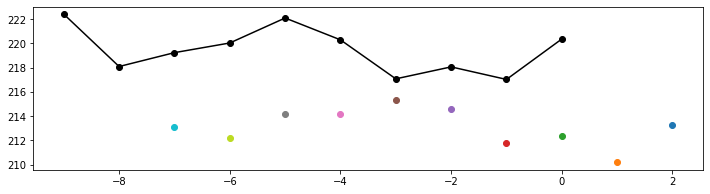

In [156]:
pred.graph_tail(index = 35)

                    y1       close
2019-10-28  159.736739  169.059998
2019-10-29  157.358131  168.809998
2019-10-30  157.832078  168.369995
2019-10-31  159.308896  164.990005
2019-11-01  165.513365  170.089996
2019-11-04  169.553097  174.899994
2019-11-05  166.713170  175.270004
2019-11-06  165.485424  174.000000
2019-11-07  167.497148  174.520004
2019-11-08  165.686886  173.149994
3409.8401269272485


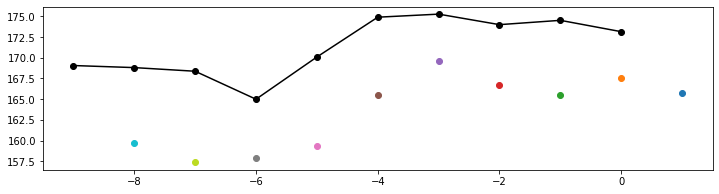

In [82]:
pred.graph_tail(index = 1)

                    y3       close
2019-10-28  258.856750  248.304520
2019-10-29  258.663116  242.561752
2019-10-30  258.643921  242.531845
2019-10-31  257.677002  248.015381
2019-11-01  256.441223  255.054260
2019-11-04  257.604218  256.729218
2019-11-05  259.455109  256.360352
2019-11-06  260.140015  256.470001
2019-11-07  259.574402  259.429993
2019-11-08  260.097046  260.140015
1543.454134206055


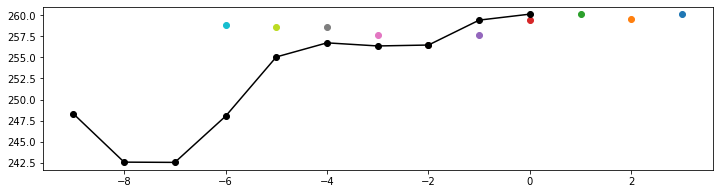

In [145]:
pred.graph_tail(index = 1)

                    y1       close
2019-10-14  248.080414  235.163971
2019-10-15  243.851105  234.615631
2019-10-16  243.161835  233.668457
2019-10-17  243.363495  234.575745
2019-10-18  243.286606  235.702362
2019-10-21  245.622635  239.790085
2019-10-22  245.441010  239.241745
2019-10-23  249.188446  242.452087
2019-10-24  250.713837  242.850891
2019-10-25  249.807571  245.841919
1295.1974872656249


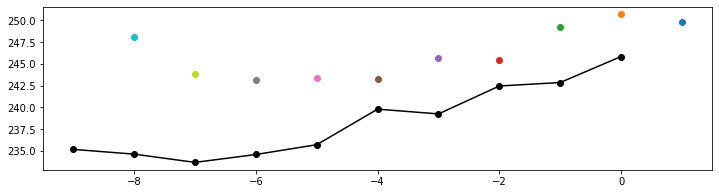

In [138]:
pred.graph_tail(index = 11)

['AAPL']
./model/AAPL/AAPL1_model.json
>  1) Now checking model: AAPL   Test error result: 0.0069
==> Best model ticker AAPL with error of 0.0069
['AAPL']
./model/AAPL/AAPL2_model.json
>  1) Now checking model: AAPL   Test error result: 0.0096
==> Best model ticker AAPL with error of 0.0096


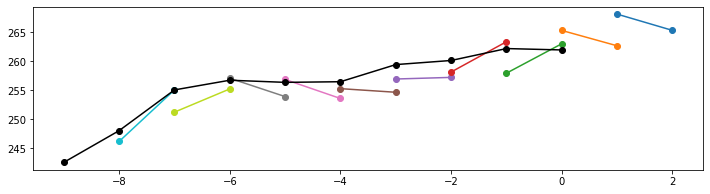

In [113]:
stock = 'AAPL'
index_list = [1,2]
db_agg = None
for i in range(len(index_list)):
    pred = Predictor(stock,target_length=i+1)
    pred.select_model(verbose=1)
    db = pred.db_return(index = 1)
    if db_agg is None:
        db = db[['close','y1']]
        db_agg = db
        continue
    db = db.drop(columns = ['close'])
    db_agg = pd.concat([db_agg, db],axis=1)

forcast_ploting(db_agg)

['AAPL']
./model/AAPL/AAPL1_model.json
>  1) Now checking model: AAPL   Test error result: 0.0110
==> Best model ticker AAPL with error of 0.0110
['AAPL']
./model/AAPL/AAPL2_model.json
>  1) Now checking model: AAPL   Test error result: 0.0151
==> Best model ticker AAPL with error of 0.0151


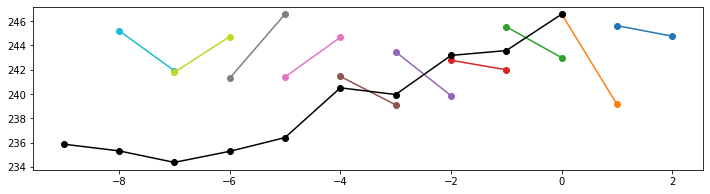

In [128]:
stock = 'AAPL'
index_list = [1,2]
db_agg = None
for i in range(len(index_list)):
    pred = Predictor(stock,target_length=i+1)
    pred.select_model(verbose=1)
    db = pred.db_return(index = 1)
    if db_agg is None:
        db = db[['close','y1']]
        db_agg = db
        continue
    db = db.drop(columns = ['close'])
    db_agg = pd.concat([db_agg, db],axis=1)

forcast_ploting(db_agg)

In [159]:
# db_agg.values
from itertools import chain
# list(chain(*))
list(chain(*db_agg.values.tolist())) 

[235.70236200000002,
 243.28660583496094,
 237.85214233398438,
 252.21804809570312,
 239.79008500000003,
 245.6226348876953,
 238.8879852294922,
 255.1836395263672,
 239.24174499999998,
 245.44100952148438,
 242.16969299316406,
 257.06134033203125,
 242.45208700000003,
 249.18844604492188,
 243.79339599609375,
 257.62939453125,
 242.85089100000002,
 250.71383666992188,
 238.38140869140625,
 258.20233154296875,
 245.841919,
 249.8075714111328,
 245.1658477783203,
 259.25262451171875,
 248.30452000000002,
 250.88894653320312,
 247.29232788085938,
 258.85675048828125,
 242.561752,
 242.52035522460938,
 243.35733032226562,
 258.6631164550781,
 242.53184500000006,
 245.20591735839844,
 243.3207550048828,
 258.6439208984375,
 248.01538100000005,
 245.8555145263672,
 247.84779357910156,
 257.677001953125]

***  Closing price prediction for GOOG *** 
==> Best model ticker HD with error of 0.0039


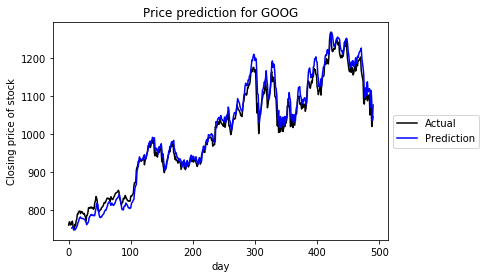

***  Closing price prediction for AAPL *** 
==> Best model ticker DWDP with error of 0.0026


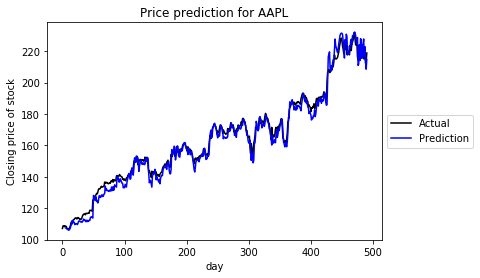

***  Closing price prediction for IBM *** 
==> Best model ticker CAT with error of 0.0059


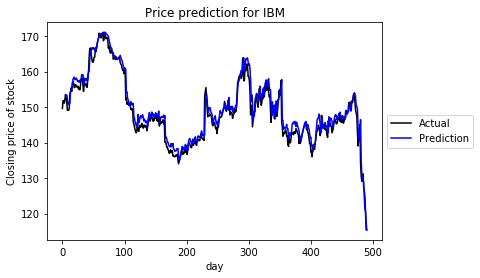

In [5]:
for ticker in tickers[1:]:
    print("***  Closing price prediction for {} *** ".format(ticker))
    pred = Predictor(ticker)
    pred.select_model(verbose=2)
    pred.graph()

In [179]:
from data_creater import *
from model import *
import re, copy

stocks = companies()
symbols = stocks['Symbol'].values.tolist()

symbol = 'AAPL'
other_symbols = [symbol_tem for symbol_tem in symbols if symbol_tem != symbol]
df = pd.read_csv('./data/{0}/all_normalized.csv'.format(symbol), index_col=[0], parse_dates=[0])
symbol_columns = [symbol_tem for symbol_tem in list(df.columns.values) if bool(re.match('normal.*', symbol_tem))]

box = []
for symbol_tem in other_symbols:
    box_tem = []
    for col in list(df.columns.values):
        if bool(re.match(symbol_tem + '_normal_.*', col)):
            box_tem.append(col)
    box.append(box_tem)

all_combination = []
all_combination.append(symbol_columns)
for box_tem in box:
    all_combination.append(symbol_columns + box_tem)
    

from keras.models import model_from_json
from keras.optimizers import RMSprop
with open('./model/AAPL/AAPL1_model.json', 'r') as json_file:
    loaded_model_json = json_file.read()
    loaded_model = model_from_json(loaded_model_json)
    loaded_model.load_weights("./model/{0}/{1:}_weights.h5".format('AAPL', 'AAPL1'))
    loaded_model.compile(loss='binary_crossentropy',optimizer='rmsprop')
    best_model = loaded_model
    

    ticker = 'AAPL'
    window_size = 4
    seq_obj = MultiSequence(ticker,window_size,1,'g000',all_combination[0])
#     print(seq_obj.X[0])

    true_value = list(chain(*seq_obj.y)) 
    predict_value = best_model.predict(seq_obj.X) ; predict_value = list(chain(*predict_value))
    df = pd.DataFrame({'true_value': true_value, 'predict_value': predict_value})
    
print(best_model.predict(seq_obj.Xpred))
print(df.tail(30))

[[0.5580871 ]
 [0.50345767]
 [0.47615066]
 [0.5537285 ]
 [0.47595328]
 [0.54399705]
 [0.3543277 ]
 [0.53362656]
 [0.5141463 ]
 [0.5700877 ]
 [0.5678773 ]
 [0.5561241 ]
 [0.57199806]
 [0.55287904]
 [0.5052823 ]
 [0.45301068]
 [0.58746696]
 [0.3941139 ]
 [0.676036  ]
 [0.6129848 ]
 [0.6751733 ]
 [0.59340847]
 [0.6388647 ]
 [0.3910339 ]
 [0.7041083 ]
 [0.6160631 ]
 [0.6877856 ]
 [0.6786157 ]
 [0.68345   ]
 [0.665248  ]
 [0.65261996]
 [0.6542304 ]
 [0.6618219 ]
 [0.6828506 ]
 [0.6763759 ]
 [0.67412055]
 [0.6926031 ]
 [0.6145779 ]
 [0.6628164 ]
 [0.6689139 ]
 [0.603274  ]
 [0.6740538 ]
 [0.68422514]
 [0.6494817 ]
 [0.61445975]
 [0.61599624]
 [0.6450576 ]
 [0.6342669 ]
 [0.65533984]
 [0.6177994 ]
 [0.62802124]
 [0.62297285]
 [0.64346445]
 [0.63393265]
 [0.628615  ]
 [0.6314292 ]
 [0.6342307 ]
 [0.6266916 ]
 [0.6205044 ]
 [0.620134  ]
 [0.62501   ]
 [0.61821085]
 [0.5982328 ]
 [0.59547853]
 [0.61835   ]
 [0.6082405 ]
 [0.5623203 ]
 [0.5146809 ]
 [0.5760069 ]
 [0.59020925]
 [0.60156363]
 [0.56